In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#single-exponential transformations
$$x=\frac{be^t+a}{e^t+1}$$
$$t=\log[(x-a)/(b-x)]$$

## uniform t

In [ ]:
def sinc_inter(x,y,deg,a,b,use_weight=True):
  t=np.log((x-a)/(b-x))
  t=np.linspace(t[0],t[-1],len(t))
  h=t[1]-t[0]
  if deg==len(t):
    idx_n=t/h
  else:
    N1=np.floor((len(t)-deg)/2).astype('int')
    N2=np.ceil((len(t)-deg)/2).astype('int')
    idx_n=(t/h)[N1:-N2]
  weight=np.ones_like(idx_n)
  if use_weight:
    weight[:4]=np.array([1/16,5/16,11/16,15/16])
    weight[-4:]=np.array([15/16,11/16,5/16,1/16])
  c=[]
  poly=[]
  for n in idx_n:
    s=np.sin(np.pi*(t/h-n+1e-20))/(np.pi*(t/h-n+1e-20))
    c.append(np.sum(y*s)*h)
    poly.append(s.copy())
  c=weight*np.array(c)
  n=weight*np.ones_like(c)
  poly=np.vstack(poly)
  return np.divide(c@poly/h,n@poly)


$y=e^{-10x^2}$

Text(0.5, 1.0, 'sinc with degree:100,error:5.819e-15')

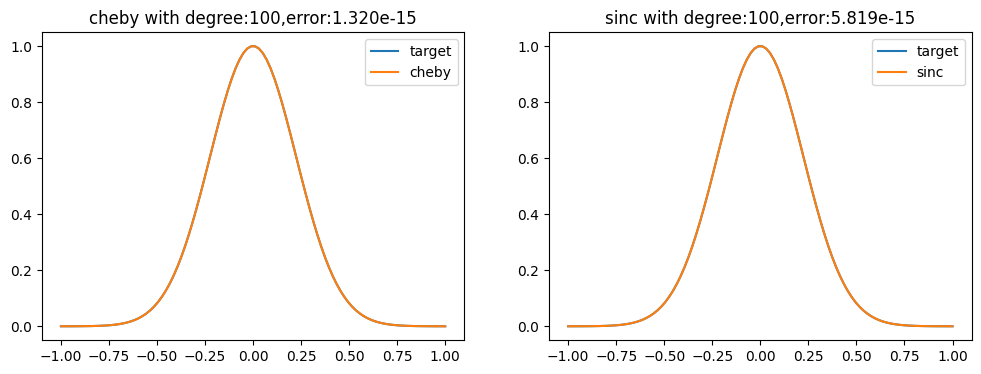

In [ ]:
a=-1
b=1
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:90,error:3.520e+00')

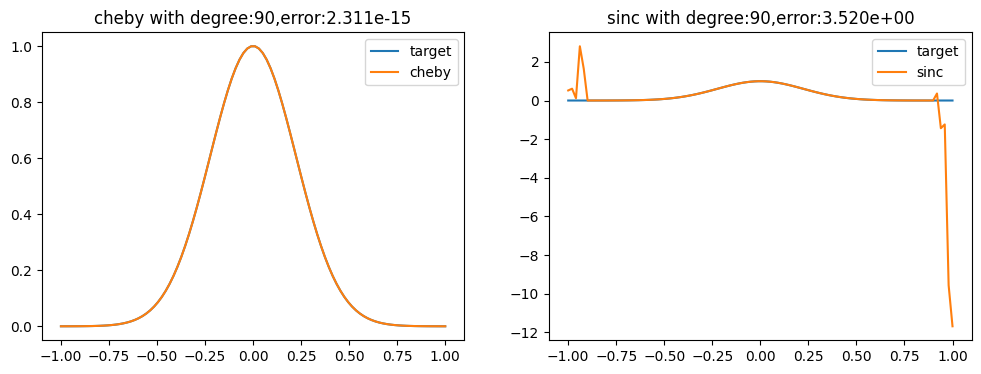

In [ ]:
a=-1
b=1
deg=90
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:100,error:7.101e-15')

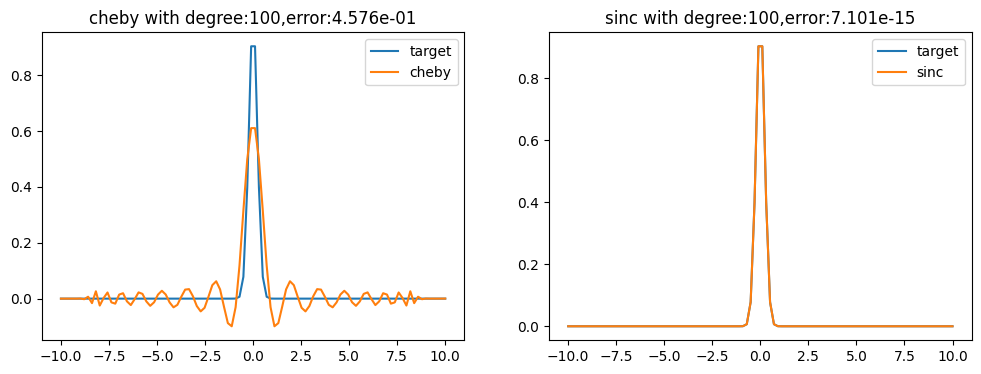

In [ ]:
a=-10
b=10
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

$y=\sqrt{x}$

Text(0.5, 1.0, 'sinc with degree:100,error:9.991e-15')

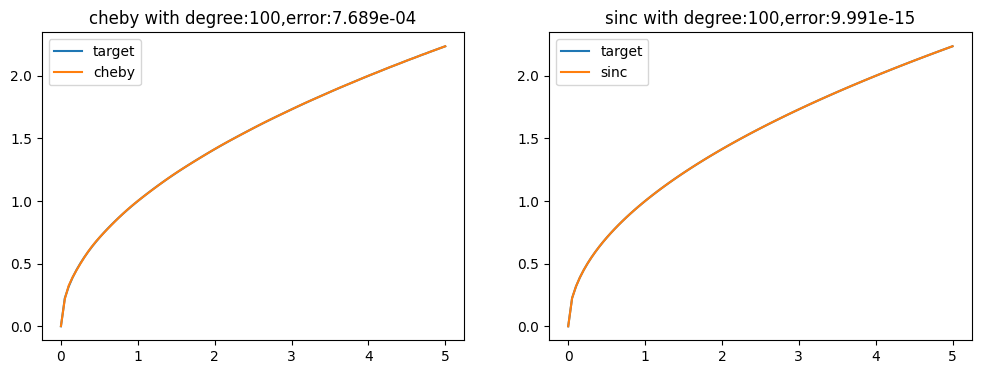

In [ ]:
a=0
b=5
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = x**0.5
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

$y=e^{-\frac{x}{ϵ}}$

Text(0.5, 1.0, 'sinc with degree:100,error:1.992e-14')

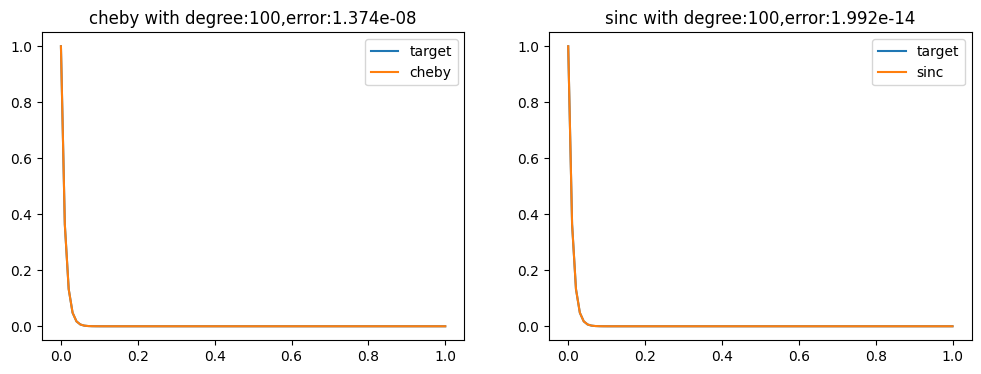

In [ ]:
a=0
b=1
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
eps=0.01
y = np.exp(-x/eps)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:100,error:3.217e-14')

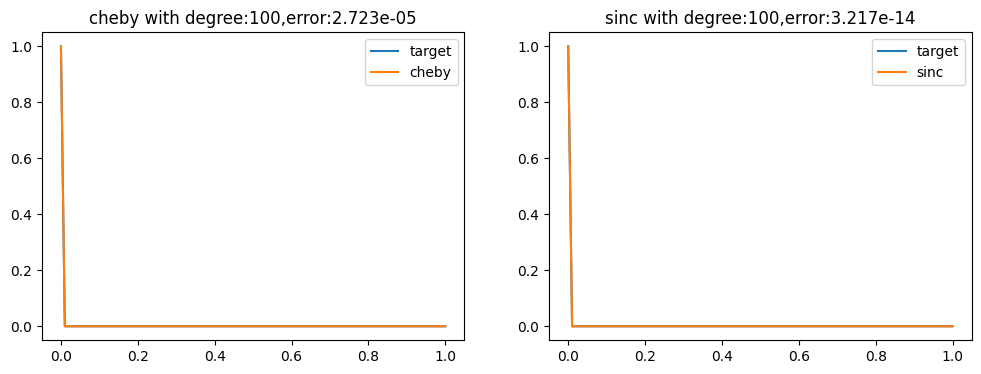

In [ ]:
a=0
b=1
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
eps=0.001
y = np.exp(-x/eps)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

## set h, nonuniform t


In [ ]:
def sinc_inter(x,y_fun,deg,a,b,use_weight=True):
  t=np.log((x-a)/(b-x))
  h=np.ceil((t[-1]-t[0])/deg*100)/100
  N1=np.floor(deg/2).astype('int')
  N2=np.ceil(deg/2).astype('int')
  idx_n=range(-N1,N2)
  weight=np.ones_like(idx_n)
  if use_weight:
    weight[:4]=np.array([1/16,5/16,11/16,15/16])
    weight[-4:]=np.array([15/16,11/16,5/16,1/16])
  c=[]
  poly=[]
  for n in idx_n:
    s=np.sin(np.pi*(t/h-n+1e-20))/(np.pi*(t/h-n+1e-20))
    c.append(y_fun(n*h))
    poly.append(s.copy())
  c=weight*np.array(c)
  n=weight*np.ones_like(c)
  poly=np.vstack(poly)
  return c@poly #np.divide(c@poly,n@poly)

Text(0.5, 1.0, 'sinc with degree:100,error:4.414e-07')

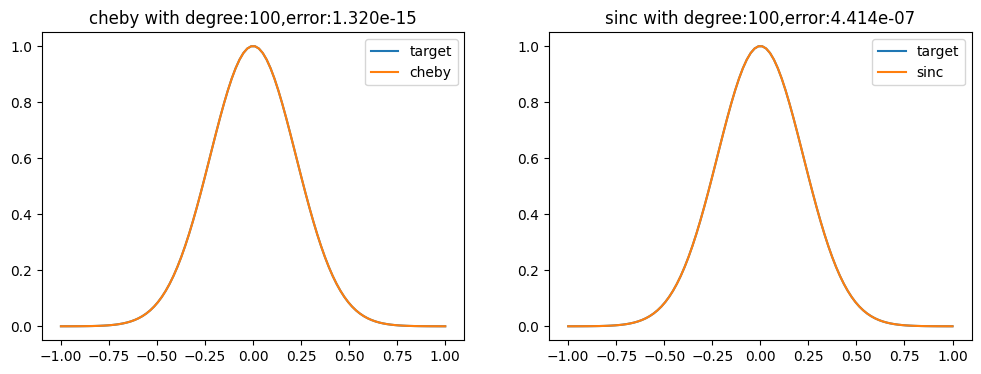

In [ ]:
a=-1
b=1
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda t: np.exp(-10*((b*np.exp(t)+a)/(np.exp(t)+1))**2)
y_sinc=sinc_inter(x,y_fun,deg,a,b, False)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:1000,error:7.466e-08')

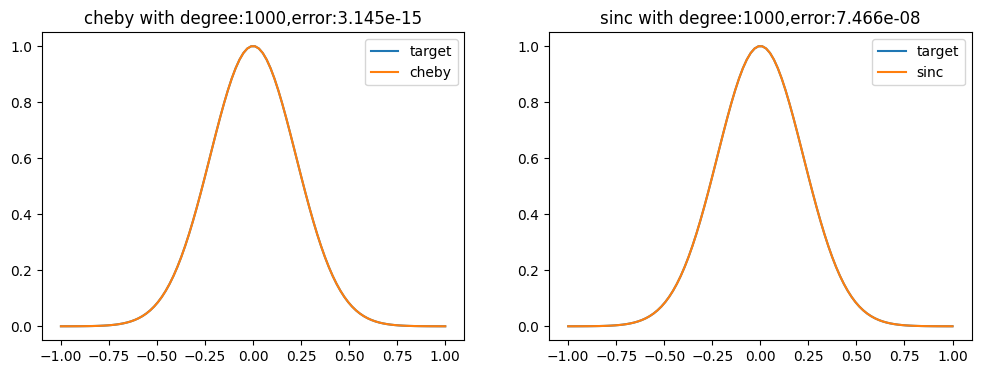

In [ ]:
a=-1
b=1
deg=1000
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg,False)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda t: np.exp(-10*((b*np.exp(t)+a)/(np.exp(t)+1))**2)
y_sinc=sinc_inter(x,y_fun,deg,a,b)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:90,error:6.129e-07')

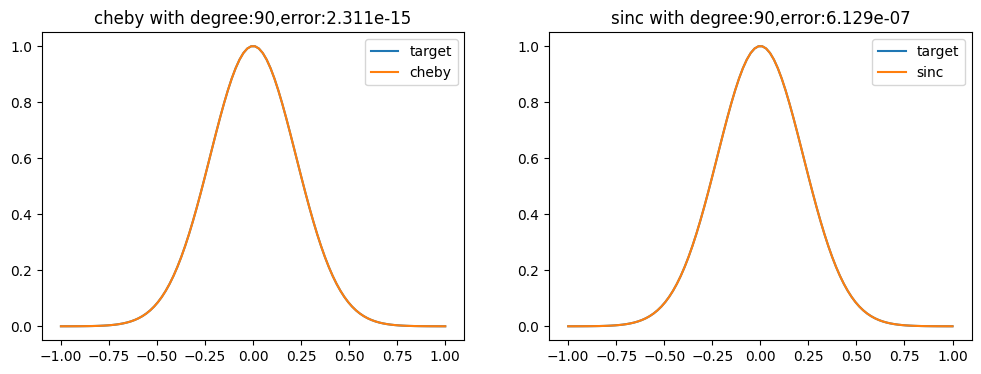

In [ ]:
a=-1
b=1
deg=90
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda t: np.exp(-10*((b*np.exp(t)+a)/(np.exp(t)+1))**2)
y_sinc=sinc_inter(x,y_fun,deg,a,b,False)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:90,error:1.473e-01')

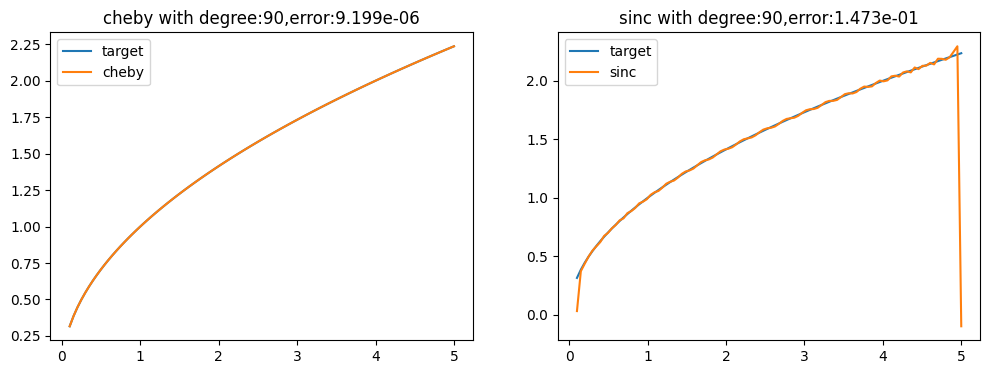

In [ ]:
a=0.1
b=5
deg=90
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = x**0.5
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda t: ((b*np.exp(t)+a)/(np.exp(t)+1))**0.5
y_sinc=sinc_inter(x,y_fun,deg,a,b,True)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:100,error:3.437e-02')

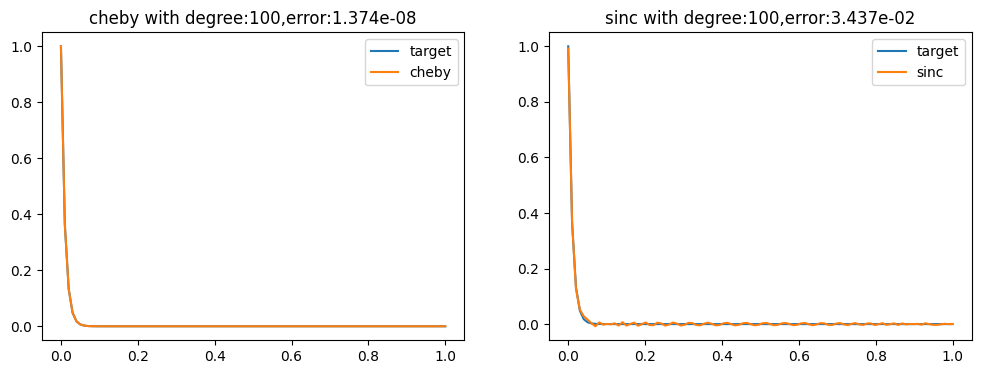

In [ ]:
a=0
b=1
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
eps=0.01
y = np.exp(-x/eps)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda t: np.exp(-((b*np.exp(t)+a)/(np.exp(t)+1))/eps)
y_sinc=sinc_inter(x,y_fun,deg,a,b,False)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

# double-exponential transformations
$$x = \frac{1}{2}\tanh\left(\frac{\pi}{2}\sinh(t)\right)+\frac{1}{2}$$
$$t = \sinh^{-1}\left[\frac{2}{\pi}\tanh^{-1}(2x-1)\right]$$

## uniform t

In [ ]:
def sinc_inter(x,y,deg,a,b,use_weight=True):
  if a!=0 or b!=1:
    p=1/(b-a)
    q=a/(a-b)
  else:
    p=1
    q=0
  t=np.arcsinh(2*np.arctanh(2*(p*x+q)-1)/np.pi)
  t=np.linspace(t[0],t[-1],len(t))
  h=t[1]-t[0]
  if deg==len(t):
    idx_n=t/h
  else:
    N1=np.floor((len(t)-deg)/2).astype('int')
    N2=np.ceil((len(t)-deg)/2).astype('int')
    idx_n=(t/h)[N1:-N2]
  weight=np.ones_like(idx_n)
  if use_weight:
    weight[:4]=np.array([1/16,5/16,11/16,15/16])
    weight[-4:]=np.array([15/16,11/16,5/16,1/16])
  c=[]
  poly=[]
  for n in idx_n:
    s=np.sin(np.pi*(t/h-n+1e-20))/(np.pi*(t/h-n+1e-20))
    c.append(np.sum(y*s)*h)
    poly.append(s.copy())
  c=weight*np.array(c)
  n=weight*np.ones_like(c)
  poly=np.vstack(poly)
  return np.divide(c@poly/h,n@poly)

$y=e^{-10x^2}$

Text(0.5, 1.0, 'sinc with degree:100,error:5.629e-15')

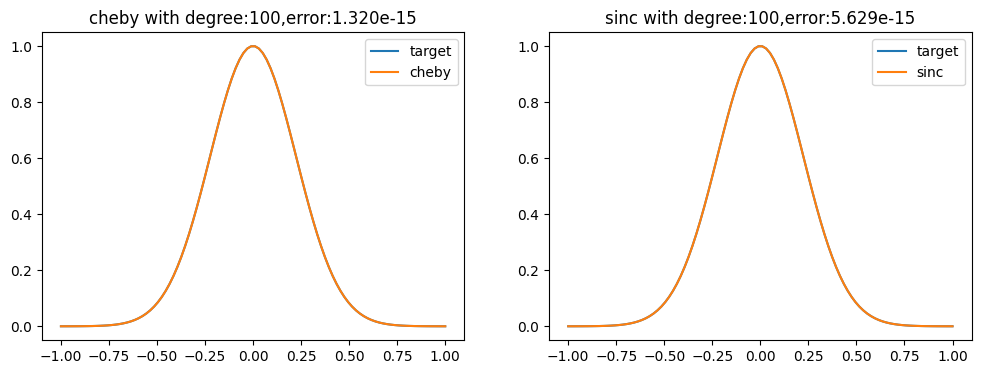

In [ ]:
a=-1
b=1
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:90,error:1.200e-01')

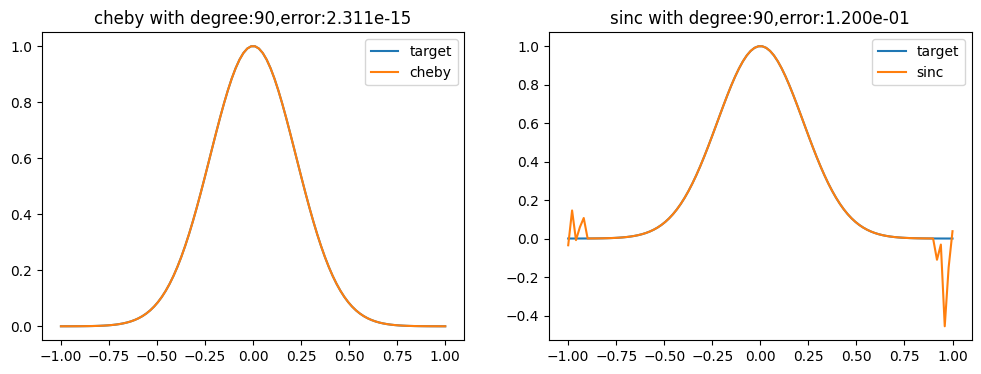

In [ ]:
a=-1
b=1
deg=90
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:100,error:4.058e-15')

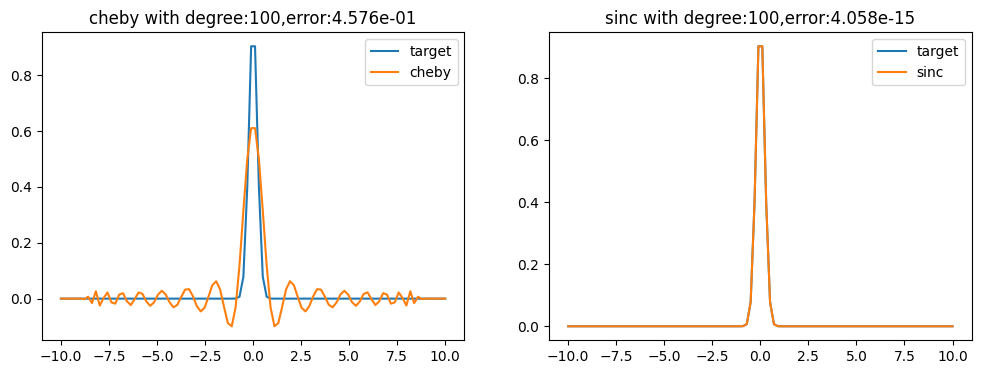

In [ ]:
a=-10
b=10
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

$y=\sqrt{x}$

Text(0.5, 1.0, 'sinc with degree:100,error:2.192e-15')

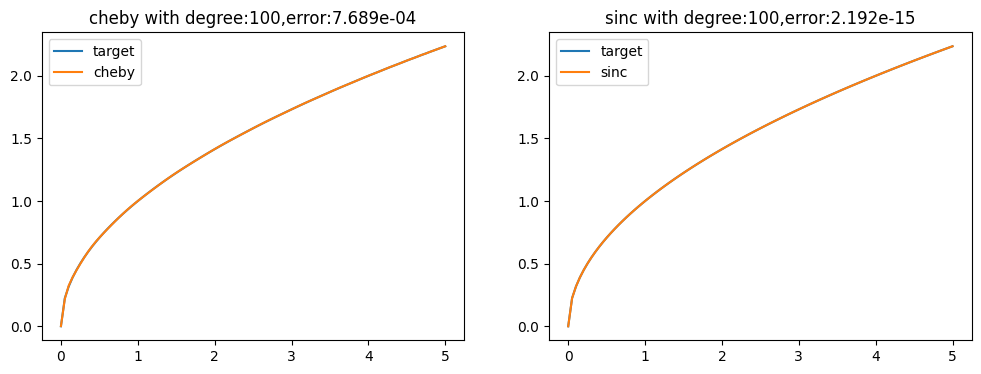

In [ ]:
a=0
b=5
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = x**0.5
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

$y=e^{-\frac{x}{ϵ}}$

Text(0.5, 1.0, 'sinc with degree:100,error:1.972e-14')

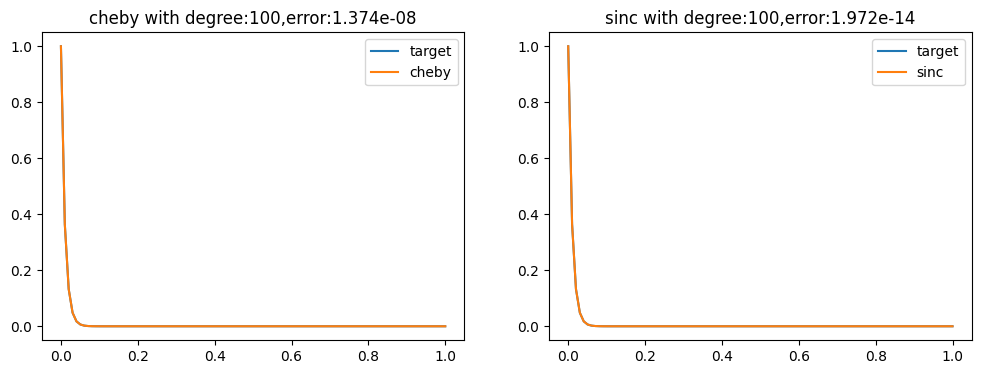

In [ ]:
a=0
b=1
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
eps=0.01
y = np.exp(-x/eps)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:100,error:3.209e-14')

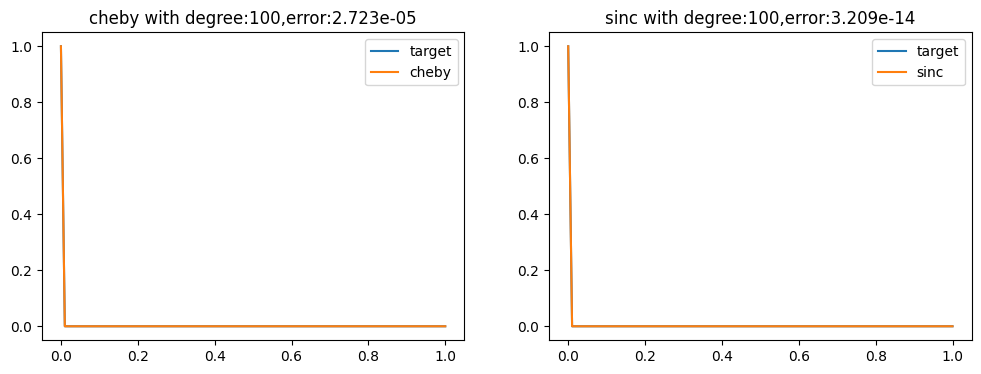

In [ ]:
a=0
b=1
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
eps=0.001
y = np.exp(-x/eps)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

$x^{1/2}(1-x)^{3/4}$

Text(0.5, 1.0, 'sinc with degree:100,error:5.239e-15')

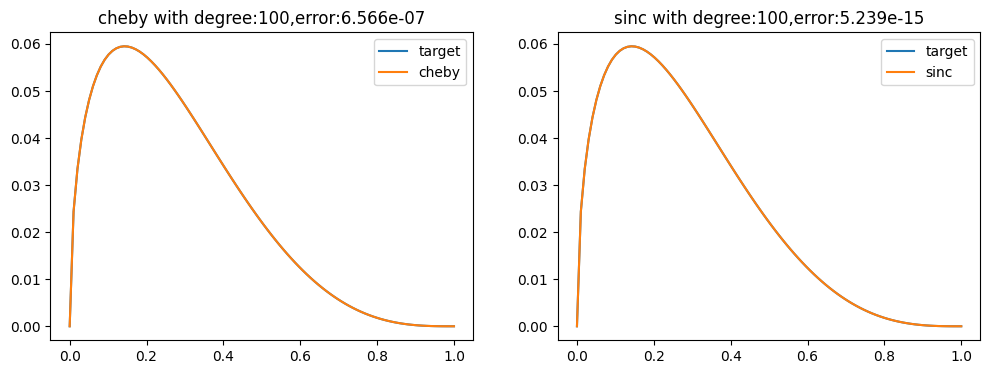

In [ ]:
a=0
b=1
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = x**0.5*(1-x)**3/4
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:100,error:1.997e-15')

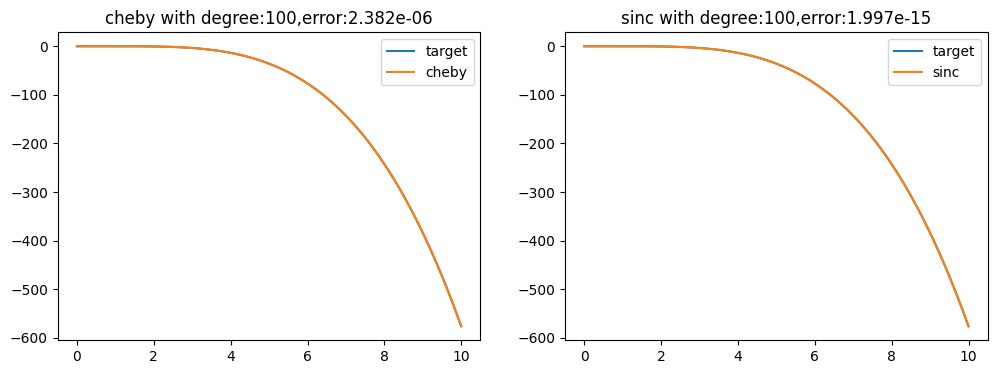

In [ ]:
a=0
b=10
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = x**0.5*(1-x)**3/4
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_sinc=sinc_inter(x,y,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

## set h, nonuniform t


In [ ]:
def sinc_inter(x,y_fun,deg,a,b,use_weight=True):
  if a!=0 or b!=1:
    p=1/(b-a)
    q=a/(a-b)
  else:
    p=1
    q=0

  t=np.arcsinh(2*np.arctanh(2*(p*x+q)-1)/np.pi)

  y_fun_t= lambda t: y_fun(((np.tanh(np.pi*np.sinh(t)/2)+1)/2-q)/p)
  h=np.ceil((t[-1]-t[0])/len(t)*100)/100
  N1=np.floor(deg/2).astype('int')
  N2=np.ceil(deg/2).astype('int')
  idx_n=range(-N1,N2)
  weight=np.ones_like(idx_n)
  if use_weight:
    weight[:4]=np.array([1/16,5/16,11/16,15/16])
    weight[-4:]=np.array([15/16,11/16,5/16,1/16])
  c=[]
  poly=[]
  for n in idx_n:
    s=np.sin(np.pi*(t/h-n+1e-20))/(np.pi*(t/h-n+1e-20))
    c.append(y_fun_t(n*h))
    poly.append(s.copy())
  c=np.array(c)
  n=np.ones_like(c)
  poly=np.vstack(poly)
  return c@poly

Text(0.5, 1.0, 'sinc with degree:100,error:3.534e-07')

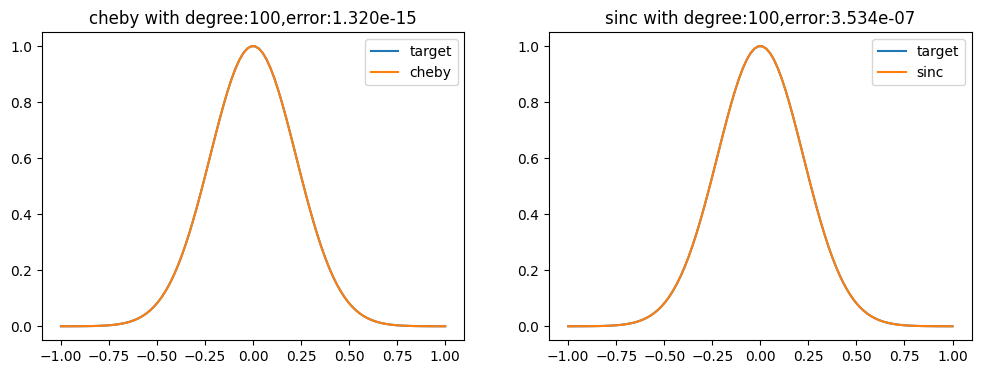

In [ ]:
a=-1
b=1
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda x: np.exp(-10*x**2)
y_sinc=sinc_inter(x,y_fun,deg,a,b)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:90,error:4.734e-07')

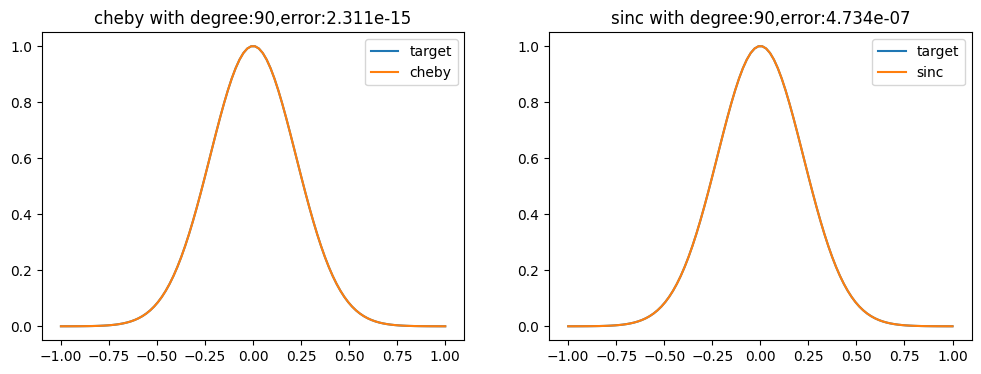

In [ ]:
a=-1
b=1
deg=90
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = np.exp(-10*x**2)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda x: np.exp(-10*x**2)
y_sinc=sinc_inter(x,y_fun,deg,a,b)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:100,error:4.076e-03')

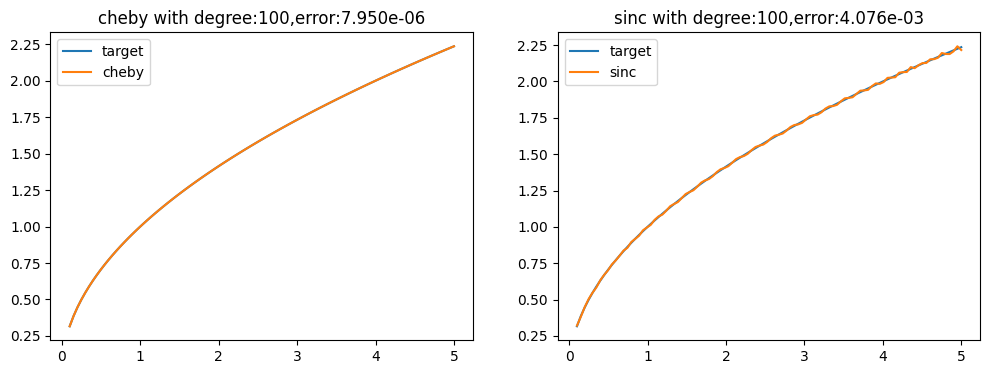

In [ ]:
a=0.1
b=5
deg=100
x = np.linspace(a,b,100)
dx=x[1]-x[0]
a=a-dx
b=b+dx
y = x**0.5
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda x: x**0.5
y_sinc=sinc_inter(x,y_fun,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

Text(0.5, 1.0, 'sinc with degree:100,error:5.984e-02')

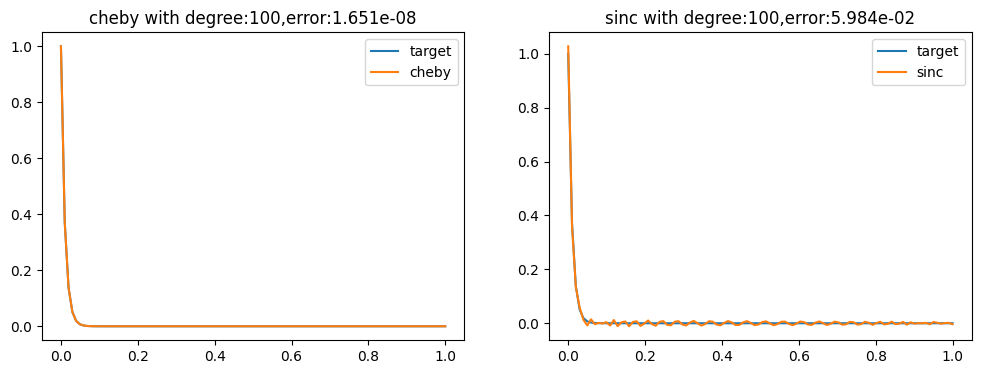

In [ ]:
a=0
b=1
deg=100
x = np.linspace(a,b,102)
dx=x[1]-x[0]
a=a-dx
b=b+dx
eps=0.01
y = np.exp(-x/eps)
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda x: np.exp(-x/eps)
y_sinc=sinc_inter(x,y_fun,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

In [ ]:
def sinc_inter(x,y_fun,deg,a,b,use_weight=True):
  if a!=0 or b!=1:
    p=1/(b-a)
    q=a/(a-b)
  else:
    p=1
    q=0

  t=np.arctanh(2*(p*x+q)-1)

  y_fun_t= lambda t: y_fun(((np.tanh(t)+1)/2-q)/p)
  h=np.sqrt(np.pi**2/1000)
  N1=np.floor(deg/2).astype('int')
  N2=np.ceil(deg/2).astype('int')
  idx_n=range(-N1,N2)
  weight=np.ones_like(idx_n)
  if use_weight:
    weight[:4]=np.array([1/16,5/16,11/16,15/16])
    weight[-4:]=np.array([15/16,11/16,5/16,1/16])
  c=[]
  poly=[]
  for n in idx_n:
    s=np.sin(np.pi*(t/h-n+1e-20))/(np.pi*(t/h-n+1e-20))
    c.append(y_fun_t(n*h))
    poly.append(s.copy())
  c=np.array(c)
  n=np.ones_like(c)
  poly=np.vstack(poly)
  return c@poly

Text(0.5, 1.0, 'sinc with degree:30,error:2.126e-01')

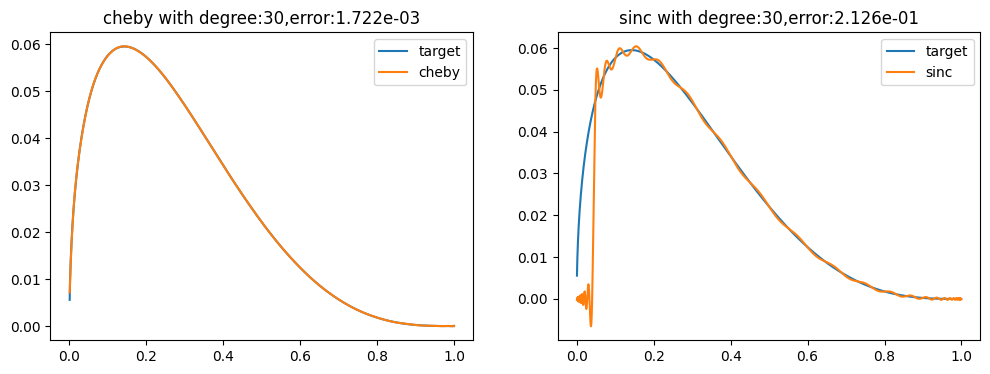

In [ ]:
a=0
b=1
deg=30
x = np.linspace(a,b,2002)[1:-1]
# dx=x[1]-x[0]
# a=a-dx
# b=b+dx
y = x**0.5*(1-x)**3/4
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda x: x**0.5*(1-x)**3/4
y_sinc=sinc_inter(x,y_fun,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{np.linalg.norm(y_cheb(x)-y)/np.linalg.norm(y):.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{np.linalg.norm(y_sinc-y)/np.linalg.norm(y):.3e}')

/usr/local/lib/python3.10/dist-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Text(0.5, 1.0, 'sinc with degree:100,error:1.537e-05')

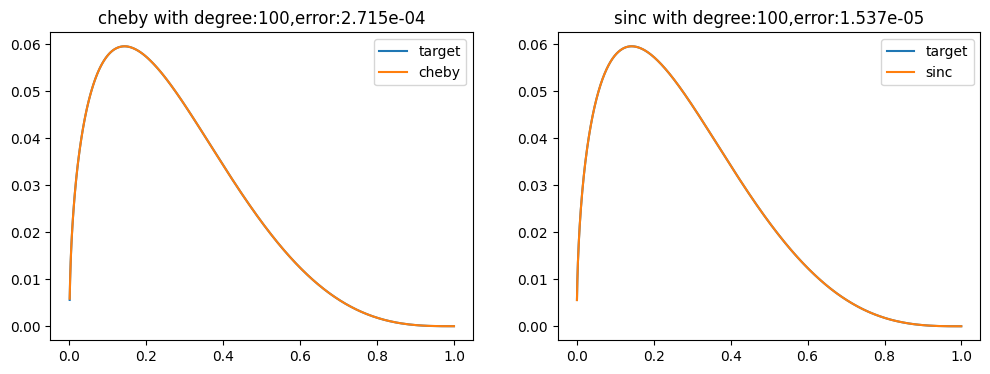

In [ ]:
a=0
b=1
deg=100
x = np.linspace(a,b,2002)[1:-1]
# dx=x[1]-x[0]
# a=a-dx
# b=b+dx
y = x**0.5*(1-x)**3/4
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda x: x**0.5*(1-x)**3/4
y_sinc=sinc_inter(x,y_fun,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{abs(y_cheb(x)-y).max():.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{abs(y_sinc-y).max():.3e}')

Text(0.5, 1.0, 'sinc with degree:200,error:2.506e-08')

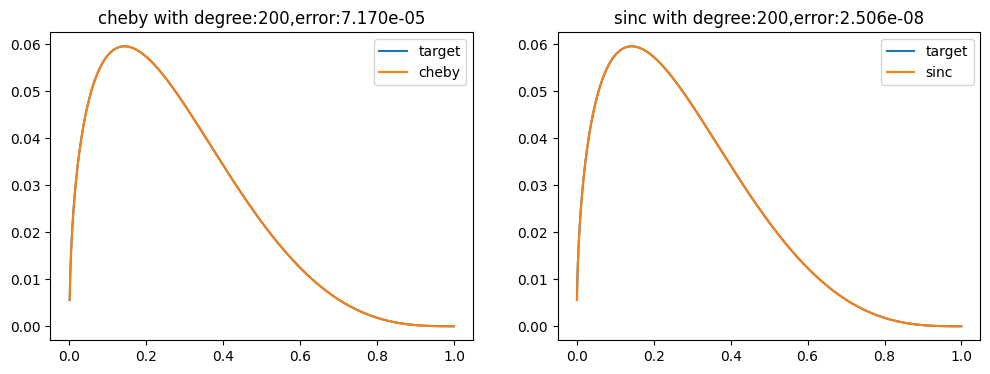

In [ ]:
a=0
b=1
deg=200
x = np.linspace(a,b,2002)[1:-1]
# dx=x[1]-x[0]
# a=a-dx
# b=b+dx
y = x**0.5*(1-x)**3/4
coef=np.polynomial.chebyshev.chebfit(x,y,deg)
y_cheb=np.polynomial.chebyshev.Chebyshev(coef)
y_fun=lambda x: x**0.5*(1-x)**3/4
y_sinc=sinc_inter(x,y_fun,deg,a,b)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x,y,label='target')
ax[0].plot(x,y_cheb(x),label='cheby')
ax[0].legend()
ax[0].set_title(f'cheby with degree:{deg},error:{abs(y_cheb(x)-y).max():.3e}')
ax[1].plot(x,y,label='target')
ax[1].plot(x,y_sinc,label='sinc')
ax[1].legend()
ax[1].set_title(f'sinc with degree:{deg},error:{abs(y_sinc-y).max():.3e}')